In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data1=pd.read_csv("student-mat.csv")
data2=pd.read_csv("student-por.csv")
#merging two data set
data=data1.append(data2)
#now reset the index column
data=data.reset_index()

In [3]:
data.columns

Index(['index', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# lets build a model using the features
require=['sex',"age","famsize","Pstatus","Medu","Fedu","reason","traveltime","studytime","schoolsup","famsup","paid","activities","higher","internet","romantic","famrel","freetime","goout","Dalc","Walc","health","absences"]
x=data[require]
y=pd.DataFrame(data['G1']+data["G2"]+(3*data["G3"]))
y["result"]=pd.DataFrame(data['G1']+data["G2"]+(3*data["G3"]))
del y[0]
x.head()

,sex,age,famsize,Pstatus,Medu,Fedu,reason,traveltime,studytime,schoolsup,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,F,18,GT3,A,4,4,course,2,2,yes,...,yes,no,no,4,3,4,1,1,3,6
1,F,17,GT3,T,1,1,course,1,2,no,...,yes,yes,no,5,3,3,1,1,3,4
2,F,15,LE3,T,1,1,other,1,2,yes,...,yes,yes,no,4,3,2,2,3,3,10
3,F,15,GT3,T,4,2,home,1,3,no,...,yes,yes,yes,3,2,2,1,1,5,2
4,F,16,GT3,T,3,3,home,1,2,no,...,yes,no,no,4,3,2,1,2,5,4


In [7]:
#now we get X and y for our model
# apply encoder to convert the text features to numerical
for column in x.columns:
    if type(x[column][0]) ==str:
        obj=LabelEncoder()
        x[column]=obj.fit_transform(x[column])

x.head()

C:\Users\ujjal\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,sex,age,famsize,Pstatus,Medu,Fedu,reason,traveltime,studytime,schoolsup,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,0,18,0,0,4,4,0,2,2,1,...,1,0,0,4,3,4,1,1,3,6
1,0,17,0,1,1,1,0,1,2,0,...,1,1,0,5,3,3,1,1,3,4
2,0,15,1,1,1,1,2,1,2,1,...,1,1,0,4,3,2,2,3,3,10
3,0,15,0,1,4,2,1,1,3,0,...,1,1,1,3,2,2,1,1,5,2
4,0,16,0,1,3,3,1,1,2,0,...,1,0,0,4,3,2,1,2,5,4


In [8]:
#cross validation
#spliting into test and training set

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [9]:
#linear Regression
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_predict_regressor=regressor.predict(X_test)
acc_regressor = round(regressor.score(X_test, y_test) * 100, 2)
print(acc_regressor)

rmse = np.sqrt(mean_squared_error(y_test,y_predict_regressor))
r2 = r2_score(y_test,y_predict_regressor)
print("root meanSquare error is=",rmse)
print("R2 score=",r2)

18.51
root meanSquare error is= 15.633837831372919
R2 score= 0.1850846427088746


In [10]:
#Polynomial Regression
poly_reg=PolynomialFeatures(degree=3)
x_poly=poly_reg.fit_transform(X_train)
x_poly_test=poly_reg.fit_transform(X_test)

lin_reg=LinearRegression()
lin_reg.fit(x_poly,y_train)
y_predict_polyreg=lin_reg.predict(x_poly_test)
acc_regressor_poly = round(lin_reg.score(x_poly, y_train) * 100, 2)
print(acc_regressor_poly)

rmse = np.sqrt(mean_squared_error(y_test,y_predict_polyreg))
r2 = r2_score(y_test,y_predict_polyreg)
print("root meanSquare error is=",rmse)
print("R2 score=",r2)



98.58
root meanSquare error is= 66.9507632532343
R2 score= -13.944877571501953


The score at degree is good but RMSE is worst than Linear regression so lets try with DERGREE =2

In [30]:
poly_reg=PolynomialFeatures(degree=2)
x_poly=poly_reg.fit_transform(X_train)
x_poly_test=poly_reg.fit_transform(X_test)

lin_reg=LinearRegression()
lin_reg.fit(x_poly,y_train)
y_predict_polyreg=lin_reg.predict(x_poly_test)
acc_regressor_poly = round(lin_reg.score(x_poly, y_train) * 100, 2)
print(acc_regressor_poly)

rmse = np.sqrt(mean_squared_error(y_test,y_predict_polyreg))
r2 = r2_score(y_test,y_predict_polyreg)
print("root meanSquare error is=",rmse)
print("R2 score=",r2)



51.15
root meanSquare error is= 17.785976226389366
R2 score= -0.05471885955967459


In [29]:
#random Forest
forest = RandomForestClassifier(n_estimators = 100)
forest = forest.fit(X_train, y_train)
forest.score(X_train, y_train)
y_pred = forest.predict(X_test)


acc_RandomForest = round(forest.score(X_train, y_train) * 100, 2)
print(acc_RandomForest)



rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print("root meanSquare error is=",rmse)
print("R2 score=",r2)





C:\Users\ujjal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


96.41
root meanSquare error is= 18.962945484164813
R2 score= -0.19892741172072248


In [39]:
#importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(forest.feature_importances_,3)})
#importances = importances.sort_values('importance',ascending=False).set_index('feature')
#print (importances)
#importances.plot.bar()
#print(sum(importances['importance']))

In [28]:
#Support Vector Classifier
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
print(acc_svc)



C:\Users\ujjal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


30.18


In [13]:
#logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log


C:\Users\ujjal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


22.99

In [14]:
#k-neighbour
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

C:\Users\ujjal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


37.01

In [15]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian



C:\Users\ujjal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


12.69

In [16]:
#decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree



96.41

compare different model Accuracy

In [19]:
model=pd.DataFrame({"MODELS":["Linear Regression","poly Regression","Random_forest","Decision Tree"," SVC","LogisticRegression","Naive baise"],
                    "accuracy":[acc_regressor,acc_regressor_poly,acc_RandomForest,acc_decision_tree,acc_svc,acc_log,acc_gaussian]
                   })
model

,MODELS,accuracy
0,Linear Regression,18.51
1,poly Regression,51.15
2,Random_forest,96.41
3,Decision Tree,96.41
4,SVC,30.18
5,LogisticRegression,22.99
6,Naive baise,12.69


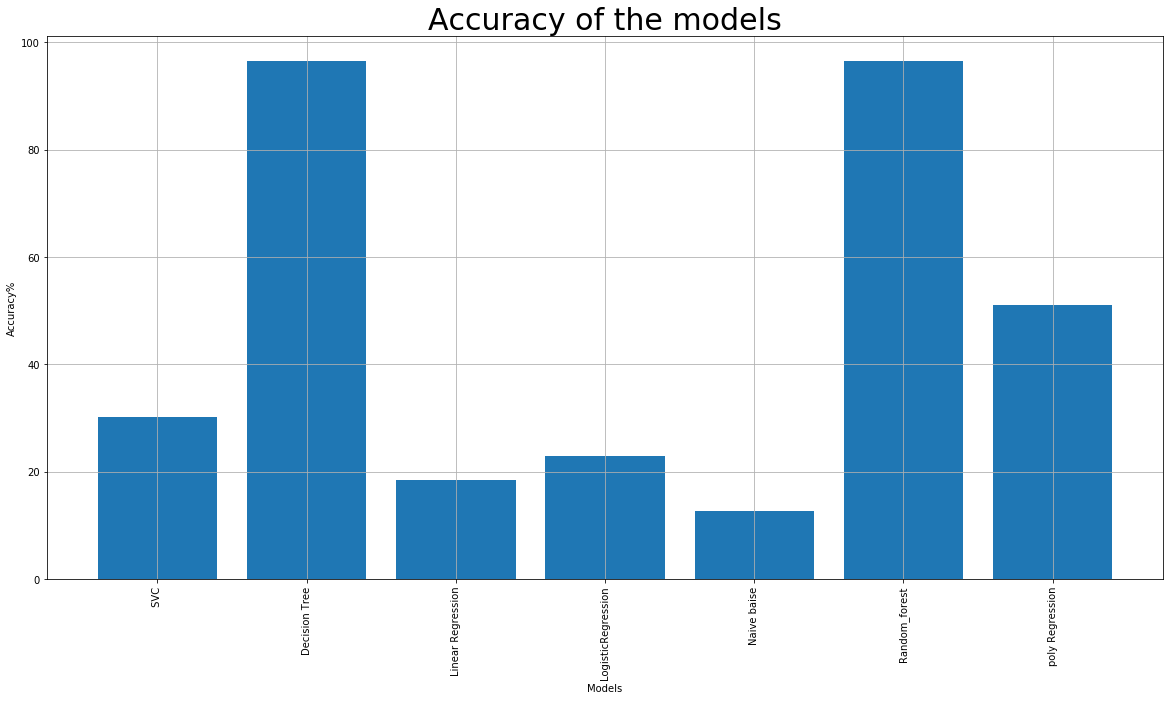

In [20]:
font=25
plt.figure(figsize=(20,10))
font=25
plt.bar(model["MODELS"],model["accuracy"])
plt.xticks(rotation=90)
plt.rcParams.update({'font.size': font})
plt.grid(True)
plt.title("Accuracy of the models")
plt.xlabel("Models")
plt.ylabel("Accuracy%")

plt.show()

So we can see that Random Forest or Disicion Tree are the best fit to the model I make.
So lets see the Importance of the Features in the Random Forest model.

In [21]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
print (importances)


            importance
feature               
absences         0.134
age              0.064
goout            0.060
health           0.058
freetime         0.057
Walc             0.054
Fedu             0.053
famrel           0.050
paid             0.049
reason           0.049
Medu             0.049
studytime        0.048
traveltime       0.038
Dalc             0.033
activities       0.031
famsup           0.029
romantic         0.028
sex              0.027
famsize          0.026
internet         0.022
schoolsup        0.015
Pstatus          0.014
higher           0.011


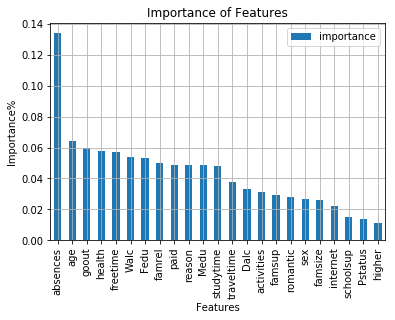

In [23]:
font=10
size=(40,30)
plt.figure(figsize=size)

importances.plot.bar()
font=10

plt.xticks(rotation=90)
plt.rcParams.update({'font.size': font})
plt.grid(True)
plt.title("Importance of Features")
plt.xlabel("Features")
plt.ylabel("Importance%")

plt.show()